In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir,path,makedirs
from os.path import isfile,join
import shutil
from sklearn.metrics import accuracy_score
import dlib

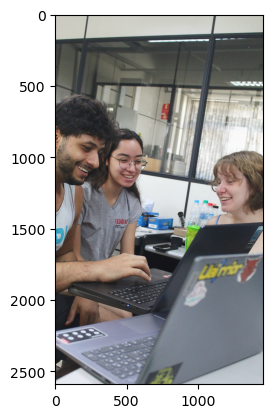

In [3]:
img = cv2.imread('C:/Users/carva/SEMEAR/Banco-Imagens/imagens/test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [13]:
classificador =dlib.get_frontal_face_detector()
faces=classificador(img_gray)
len(faces)


2

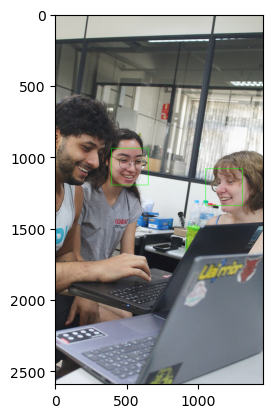

: 

In [15]:
img_copy = img.copy()
for face in faces:
    e, t, d, b = (int(face.left()), int(face.top()), int(face.right()), int(face.bottom()))
    cv2.rectangle(img_copy, (e, t), (d, b), (0, 255, 0), 2)
plt.imshow(img_copy)

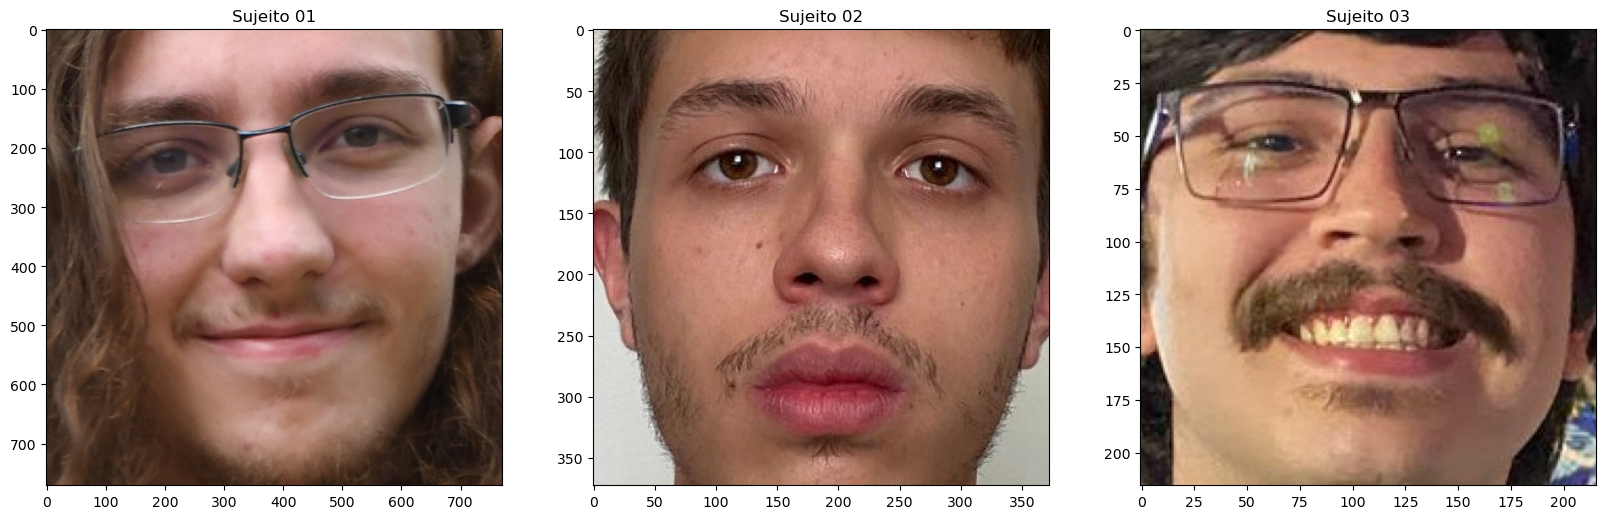

In [4]:
image_face_1 = cv2.imread("C:/Users/carva/SEMEAR/Banco-Imagens/rostos/cuca_rosto_1.jpg")
image_face_1 = cv2.cvtColor(image_face_1, cv2.COLOR_BGR2RGB)

image_face_2 = cv2.imread("C:/Users/carva/SEMEAR/Banco-Imagens/rostos/Jose_rosto_1.jpg")
image_face_2 = cv2.cvtColor(image_face_2, cv2.COLOR_BGR2RGB)

image_face_3 = cv2.imread("C:/Users/carva/SEMEAR/Banco-Imagens/rostos/TIM_rosto_1.jpg")
image_face_3 = cv2.cvtColor(image_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(image_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(image_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(image_face_3)

plt.show()

In [5]:
faces_caminho = "C:/Users/carva/SEMEAR/Banco-Imagens/rostos"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho,f))]

In [5]:
faces_path_treino = "C:/Users/carva/SEMEAR/Banco-Imagens/faces_treino/"
faces_path_teste = "C:/Users/carva/SEMEAR/Banco-Imagens/faces_teste/"


In [ ]:

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)
    
# Proporção de divisão (por exemplo, 80-20)
proporcao_treinamento = 0.8

# Dicionário para rastrear o número de rostos para cada sujeito
num_rostos_por_sujeito = {}

for arq in lista_arq_faces:
    # Extrai informações sobre o sujeito e número do rosto
    sujeito = arq.split("_")[0]
    numero = int(arq.split("_")[-1].split(".")[0])

    # Inicializa o contador se o sujeito ainda não foi visto
    num_rostos_por_sujeito.setdefault(sujeito, 0)

    # Caminho de destino dependendo da proporção
    destino = faces_path_treino if num_rostos_por_sujeito[sujeito] < int(proporcao_treinamento * 15) else faces_path_teste

    # Atualiza o contador
    num_rostos_por_sujeito[sujeito] += 1

    # Copie o arquivo para o destino
    shutil.copyfile(os.path.join(faces_caminho, arq), os.path.join(destino, arq))

In [6]:
def padronizar_imagem(imagem_path):
    imagem = cv2.imread(imagem_path , cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem,(200,200), interpolation = cv2.INTER_LANCZOS4)
    return imagem

In [7]:
list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino,f))]
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste,f))]

In [8]:
list_faces_treino[0]


'cuca_rosto_1.jpg'

In [10]:
list_faces_teste[0]


'cuca_rosto_7.jpg'

In [9]:
dados_treinamento, sujeitos_treino = [], []
dados_teste, sujeitos_teste = [], []
nomes_sujeitos = {}

In [10]:
for i, arq in enumerate (list_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito_treino = arq.split("_")[0]
    if sujeito_treino not in nomes_sujeitos:
        nomes_sujeitos[sujeito_treino] = len(nomes_sujeitos)
    sujeitos_treino.append(nomes_sujeitos[sujeito_treino])
    
        
for i , arq in enumerate (list_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito_teste = arq.split("_")[0]
    if sujeito_teste not in nomes_sujeitos:
        nomes_sujeitos[sujeito_teste] = len(nomes_sujeitos)
    sujeitos_teste.append(nomes_sujeitos[sujeito_teste])

In [11]:
sujeitos_teste = np.asarray(sujeitos_teste,dtype=np.int32)
sujeitos_treino = np.asarray(sujeitos_treino,dtype=np.int32)

Text(0.5, 1.0, '1')

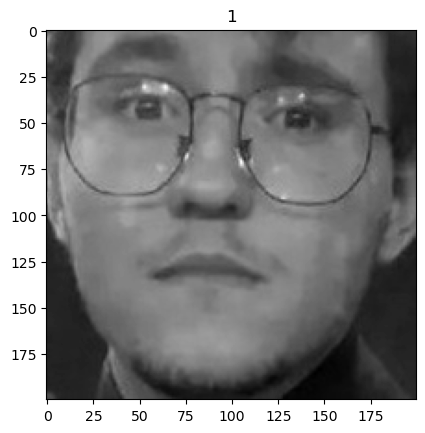

In [12]:
plt.imshow(dados_treinamento[16], cmap="gray")
plt.title(sujeitos_treino[16])

Text(0.5, 1.0, '0')

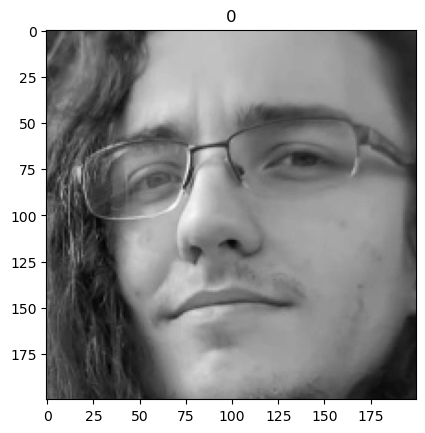

In [19]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

In [13]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()


In [14]:
modelo_eingenfaces.train(dados_treinamento,sujeitos_treino)

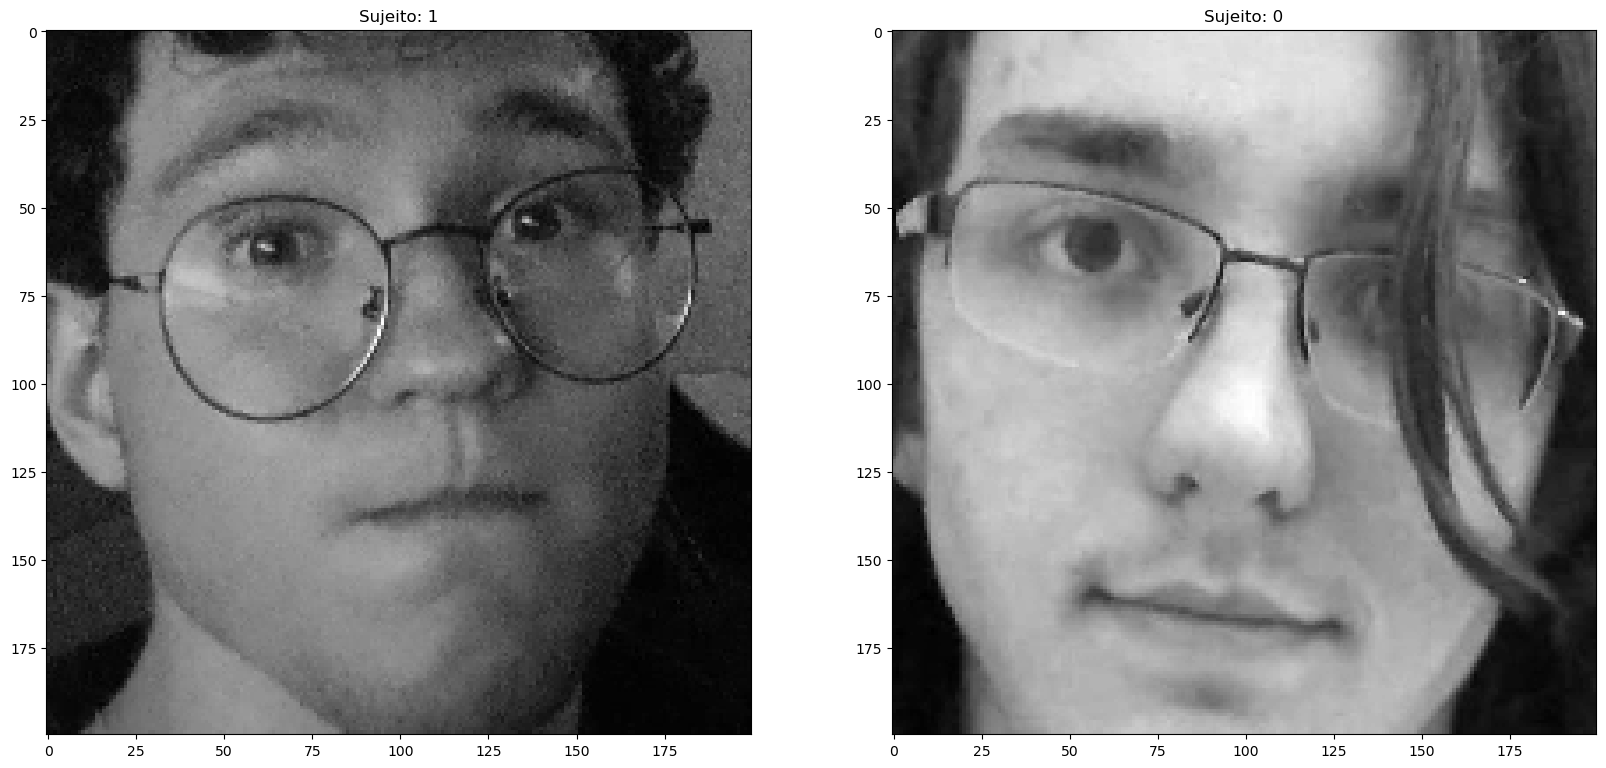

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title( "Sujeito: " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap='gray')

plt.subplot(122)
plt.title( "Sujeito: " + str(sujeitos_teste[2]))
plt.imshow(dados_teste[2], cmap='gray')

plt.show()

In [15]:
predict = modelo_eingenfaces.predict(dados_teste[13])
predict

(6, 10931.621253125055)

In [16]:
dict_nomes = {}
for nome, valor in nomes_sujeitos.items():
    dict_nomes[valor] = nome
    
print("Sujeito: ", dict_nomes[predict[0]])

Sujeito:  pedrinho


In [40]:
import numpy as np
import cv2
from collections import deque, Counter

# Inicializa a captura de vídeo
cap = cv2.VideoCapture(0)

# Carrega o classificador de face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define o número de frames para considerar na votação
N = 10
# Inicializa uma fila para armazenar os últimos N nomes identificados para cada rosto
nomes_recentes = deque(maxlen=N)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    palpites_frame_atual = []

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        try:
            # Redimensiona o ROI para o tamanho esperado pelo modelo Eigenfaces
            roi_gray_resized = cv2.resize(roi_gray, (200, 200))
            # Realiza a previsão com o modelo Eigenfaces
            label = modelo_eingenfaces.predict(roi_gray_resized.reshape(1, -1))
            nome = dict_nomes[label[0]]
            palpites_frame_atual.append(nome)
        except:
            continue

    # Atualiza a fila de nomes recentes com os palpites do frame atual
    nomes_recentes.extend(palpites_frame_atual)

    # Calcula o nome mais comum nos últimos N frames
    if nomes_recentes:
        nome_mais_frequente = Counter(nomes_recentes).most_common(1)[0][0]
        for (x, y, w, h) in faces:
            cv2.putText(frame, nome_mais_frequente, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [47]:
import cv2
import mediapipe as mp
from collections import deque, Counter

# Inicializa o MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

cap = cv2.VideoCapture(0)

# Estrutura para armazenar os palpites recentes de cada rosto
N = 10
rosto_palpites = {}

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        continue

    # Converte a imagem de BGR para RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Processa a imagem e encontra rostos
    results = face_detection.process(image)

    # Converte a imagem de volta para BGR para desenhar
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.detections:
        for i, detection in enumerate(results.detections):
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                         int(bboxC.width * iw), int(bboxC.height * ih)
            # Aqui você pode integrar a parte de reconhecimento facial, como anteriormente
            # Por exemplo, extrair a região de interesse e aplicar seu modelo Eigenfaces
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Suponha que você tenha obtido um nome após o reconhecimento
            label = modelo_eingenfaces.predict(roi_gray_resized.reshape(1, -1))
            nome = dict_nomes[label[0]]

            # Atualiza a fila de nomes recentes para o rosto atual
            if i not in rosto_palpites:
                rosto_palpites[i] = deque(maxlen=N)
            rosto_palpites[i].append(nome)

            # Calcula o nome mais comum nos últimos N frames para o rosto atual
            nome_mais_frequente = Counter(rosto_palpites[i]).most_common(1)[0][0]
            cv2.putText(image, nome_mais_frequente, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

            # Desenha o retângulo ao redor do rosto
            mp_drawing.draw_detection(image, detection)

    # Exibe o resultado
    cv2.imshow('MediaPipe Face Detection', image)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()


In [17]:
import cv2
import mediapipe as mp
from collections import deque, Counter
import numpy as np

# Substitua estas linhas pelo carregamento do seu modelo e dicionário de nomes
# modelo_eigenfaces = carregar_seu_modelo()
# dict_nomes = {0: "Nome1", 1: "Nome2", ...}

# Inicializa o MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

cap = cv2.VideoCapture(0)

# Estrutura para armazenar os palpites recentes de cada rosto
N = 10
rosto_palpites = {}

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        continue

    # Converte a imagem de BGR para RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Processa a imagem e encontra rostos
    results = face_detection.process(image_rgb)

    # Converte a imagem de volta para BGR para desenhar
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

    if results.detections:
        for i, detection in enumerate(results.detections):
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image_bgr.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                         int(bboxC.width * iw), int(bboxC.height * ih)
            
            # Extrai e prepara a ROI para o modelo
            roi = image_bgr[y:y+h, x:x+w]
            roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            roi_gray_resized = cv2.resize(roi_gray, (200, 200))  # Ajuste conforme necessário

            try:
                # Realiza a previsão com o modelo Eigenfaces
                label = modelo_eingenfaces.predict(roi_gray_resized.reshape(1, -1))
                nome = dict_nomes[label[0]]

                # Atualiza a fila de nomes recentes para o rosto atual
                if i not in rosto_palpites:
                    rosto_palpites[i] = deque(maxlen=N)
                rosto_palpites[i].append(nome)

                # Calcula o nome mais comum nos últimos N frames para o rosto atual
                nome_mais_frequente = Counter(rosto_palpites[i]).most_common(1)[0][0]
                cv2.putText(image_bgr, nome_mais_frequente, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            except Exception as e:
                print(e)
                continue

            # Desenha o retângulo ao redor do rosto
            cv2.rectangle(image_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibe o resultado
    cv2.imshow('MediaPipe Face Detection', image_bgr)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

In [103]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [104]:
modelo_fisherfaces.train(dados_treinamento,sujeitos_treino)

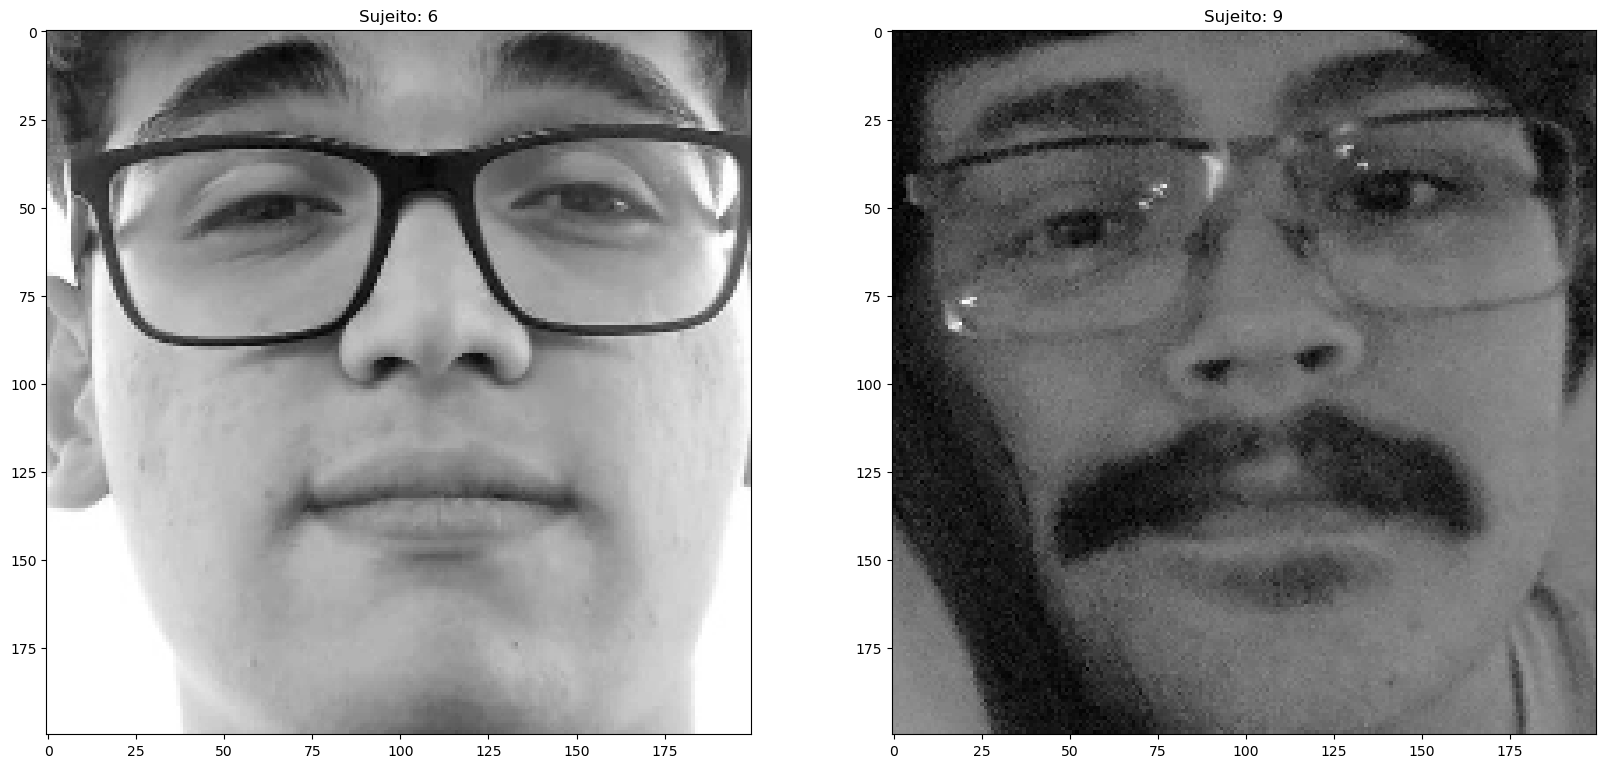

In [39]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title( "Sujeito: " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap='gray')

plt.subplot(122)
plt.title( "Sujeito: " + str(sujeitos_teste[15]))
plt.imshow(dados_teste[15], cmap='gray')

plt.show()

In [106]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(5, 2101.35708048293)

In [107]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [108]:
modelo_lbph.train(dados_treinamento,sujeitos_treino)

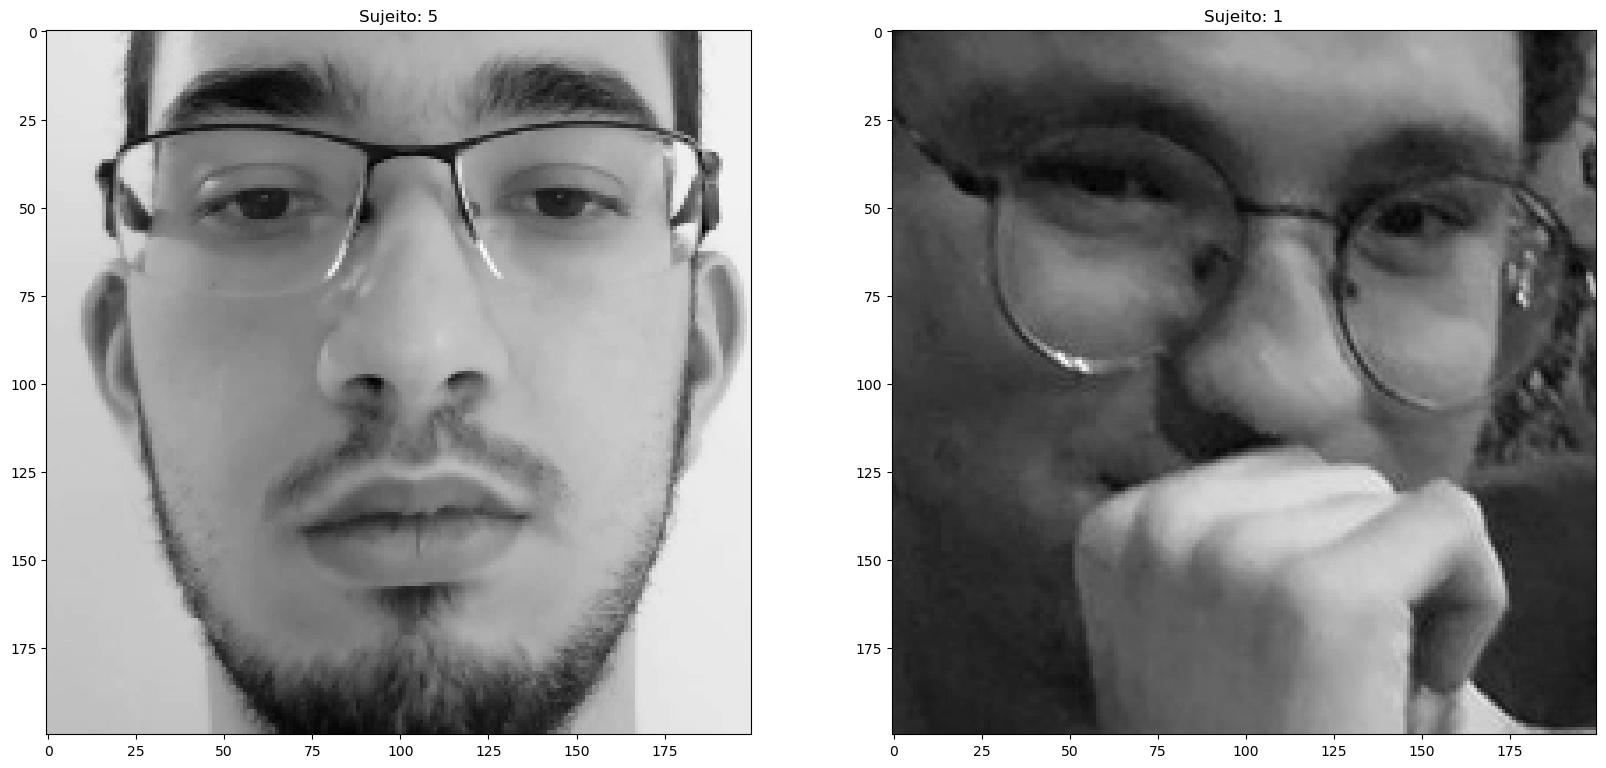

In [109]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title( "Sujeito: " + str(sujeitos_teste[10]))
plt.imshow(dados_teste[10], cmap='gray')

plt.subplot(122)
plt.title( "Sujeito: " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap='gray')

plt.show()

In [110]:
predicao = modelo_lbph.predict(dados_teste[10])
predicao

(5, 49.84783517186994)

In [111]:
predicao = modelo_lbph.predict(dados_teste[7])
predicao

(9, 66.64973203245964)

In [112]:
y_pred_eigenfaces = []
for i in range(len(dados_teste)):
    predicao = modelo_eingenfaces.predict(dados_teste[i])
    y_pred_eigenfaces.append(predicao[0])

In [113]:
acuracia_eigenfaces = accuracy_score(sujeitos_teste, y_pred_eigenfaces)
acuracia_eigenfaces

0.6666666666666666

In [114]:
y_pred_fisherfaces = []
for i in range(len(dados_teste)):
    predicao = modelo_fisherfaces.predict(dados_teste[i])
    y_pred_fisherfaces.append(predicao[0])

In [115]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
acuracia_fisherfaces

0.3888888888888889

In [116]:
y_pred_lbph = []
for i in range(len(dados_teste)):
    predicao = modelo_lbph.predict(dados_teste[i])
    y_pred_lbph.append(predicao[0])

In [117]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

0.4444444444444444